In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [67]:
import pandas as pd
f=open("C:\\Users\\91990\\Downloads\\DataSet1.txt",'r')
List_data=f.readlines()
List_data.pop(0)
List_data.pop(0)
poly=[]
Rg=[]
substring='\n'
for i in List_data:
    strin=i.split("   ")
    f=strin[1].split(substring)
    poly.append(strin[0])
    Rg.append(float(f[0]))
main=[poly,Rg]
df = pd.DataFrame(main).T
X = df[0].to_numpy()
y = df[1].to_numpy()

In [99]:
y

array([4.70913, 3.52856, 3.78269, ..., 4.18211, 4.34533, 3.07417],
      dtype=object)

In [68]:
len(X[5])

100

In [69]:
X.shape

(7876,)

In [70]:
L = []
for k in range(7876):
    s = X[k]
    x = [i for i in s] 
    L.append(x)
len(L)

7876

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(L)

In [58]:
X

<7876x200 sparse matrix of type '<class 'numpy.float64'>'
	with 787600 stored elements in Compressed Sparse Row format>

In [100]:
X_train, X_test, y_train, y_test = train_test_split(L, y, test_size=0.20, shuffle=True)

In [93]:
def regression_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(100,)))
    #model.add(Dropout(0.3))
    model.add(Dense(20, activation ='relu'))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [102]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_test
#x = np.asarray(x).astype('float32')

array([5.14481, 5.14481, 5.14481, ..., 4.48485, 3.13823, 5.14481],
      dtype=float32)

In [90]:
y_train.shape
X_train.shape

(6300, 100)

In [103]:
m = regression_model()
trial_fit = m.fit(X_train, y_train, batch_size = 100, epochs=300, verbose=1, validation_split=0.01)

Epoch 1/300
63/63 [==============================] - 1s 3ms/step - loss: 12.4808 - val_loss: 0.6036
Epoch 2/300
63/63 [==============================] - 0s 1ms/step - loss: 0.2390 - val_loss: 0.0557
Epoch 3/300
63/63 [==============================] - 0s 1ms/step - loss: 0.1098 - val_loss: 0.0537
Epoch 4/300
63/63 [==============================] - 0s 1ms/step - loss: 0.1001 - val_loss: 0.0491
Epoch 5/300
63/63 [==============================] - 0s 1ms/step - loss: 0.0941 - val_loss: 0.0479
Epoch 6/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0891 - val_loss: 0.0447
Epoch 7/300
63/63 [==============================] - 0s 1ms/step - loss: 0.0861 - val_loss: 0.0427
Epoch 8/300
63/63 [==============================] - 0s 1ms/step - loss: 0.0833 - val_loss: 0.0399
Epoch 9/300
63/63 [==============================] - 0s 1ms/step - loss: 0.0811 - val_loss: 0.0384
Epoch 10/300
63/63 [==============================] - 0s 1ms/step - loss: 0.0781 - val_loss: 0.0370
Epoch 11

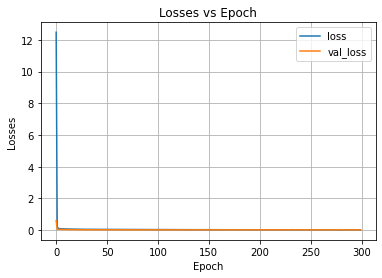

In [104]:
plt.figure()
plt.plot(trial_fit.history['loss'], label='loss')
plt.plot(trial_fit.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [106]:
pr = m.predict(X_train)

197/197 [==============================] - 0s 743us/step


0.970287791437907


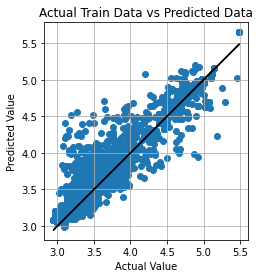

In [107]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_train, pr)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_train, y_train, 'k-')
plt.grid()

print(r2_score(y_train, pr))

In [109]:
predictions = m.predict(X_test)

50/50 [==============================] - 0s 732us/step


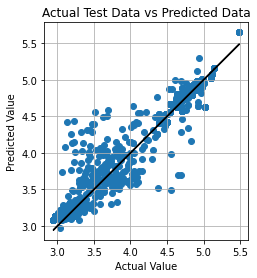

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test, predictions)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_test, y_test, 'k-')
plt.grid()

In [111]:
print(r2_score(y_test, predictions))

0.9582564438163591


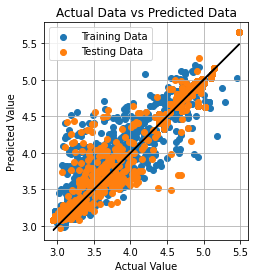

In [112]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_train, pr, label = 'Training Data')
plt.scatter(y_test, predictions, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(y_train, y_train, 'k-')
plt.grid()